In [1]:
# load the data set
import pandas as pd

df = pd.read_csv("C:/Users/Hp/Downloads/house_price.csv")


In [2]:
#Check for missing values
print(df.isnull().sum())


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [3]:
# Basic statistics
print(df.describe())


         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [4]:
#Data types
print(df.dtypes)


location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


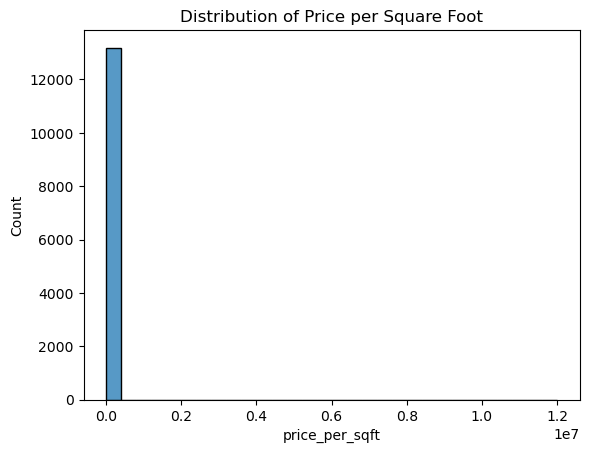

In [5]:
# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price_per_sqft'], bins=30)
plt.title('Distribution of Price per Square Foot')
plt.show()


In [6]:
#Outlier Detection and Removal
#a) Mean and Standard Deviation
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

# Define boundaries
lower_limit = mean - 3 * std_dev
upper_limit = mean + 3 * std_dev

# Remove outliers
df_trimmed_mean_std = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]


In [7]:
#b) Percentile Method
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

df_trimmed_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]


In [8]:
#c) IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_trimmed_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [9]:
#d) Z-Score Method
from scipy.stats import zscore

df['z_score'] = zscore(df['price_per_sqft'])
df_trimmed_z = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]


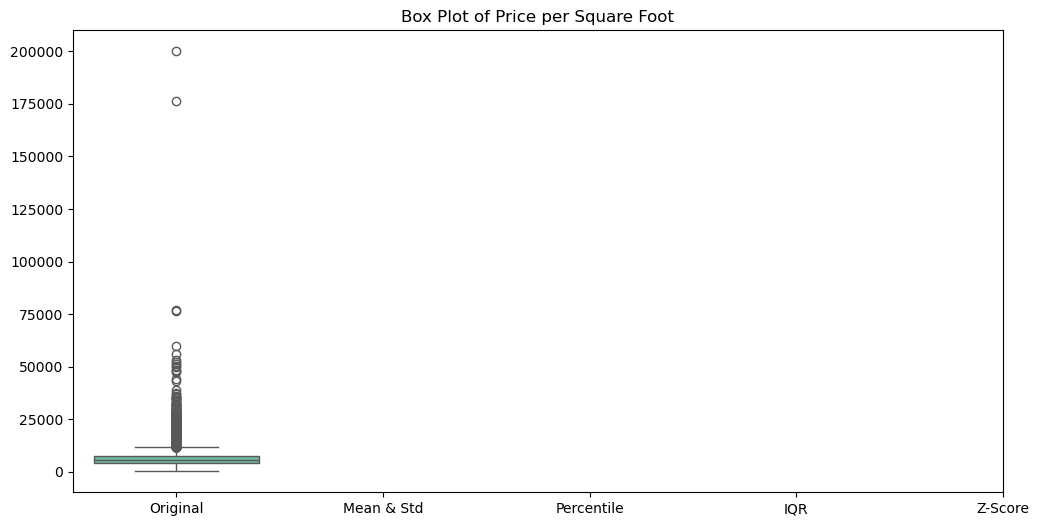

In [10]:
 #Box Plot for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['price_per_sqft'], df_trimmed_mean_std['price_per_sqft'], df_trimmed_percentile['price_per_sqft'], df_trimmed_iqr['price_per_sqft'], df_trimmed_z['price_per_sqft']], 
             palette='Set2')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Original', 'Mean & Std', 'Percentile', 'IQR', 'Z-Score'])
plt.title('Box Plot of Price per Square Foot')
plt.show()


Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382
Skewness after transformation: 1.3997035748119977
Kurtosis after transformation: 9.199636085376468


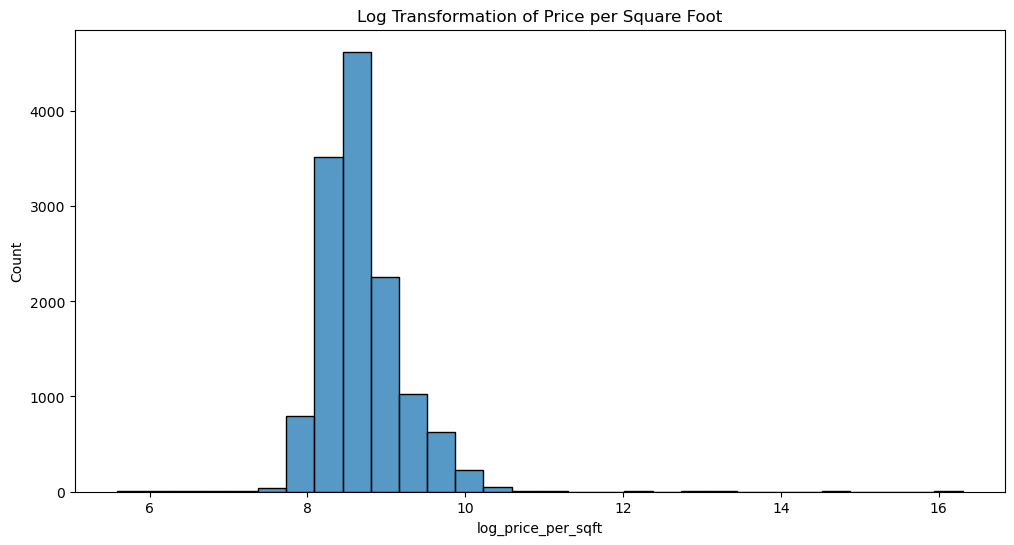

In [11]:
# Normality Check and Transformation
from scipy.stats import skew, kurtosis
from scipy import stats
import numpy as np
# Check skewness and kurtosis
print('Skewness before transformation:', skew(df['price_per_sqft']))
print('Kurtosis before transformation:', kurtosis(df['price_per_sqft']))

# Log transformation
df['log_price_per_sqft'] = np.log(df['price_per_sqft'])

# Check skewness and kurtosis after transformation
print('Skewness after transformation:', skew(df['log_price_per_sqft']))
print('Kurtosis after transformation:', kurtosis(df['log_price_per_sqft']))

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['log_price_per_sqft'], bins=30)
plt.title('Log Transformation of Price per Square Foot')
plt.show()


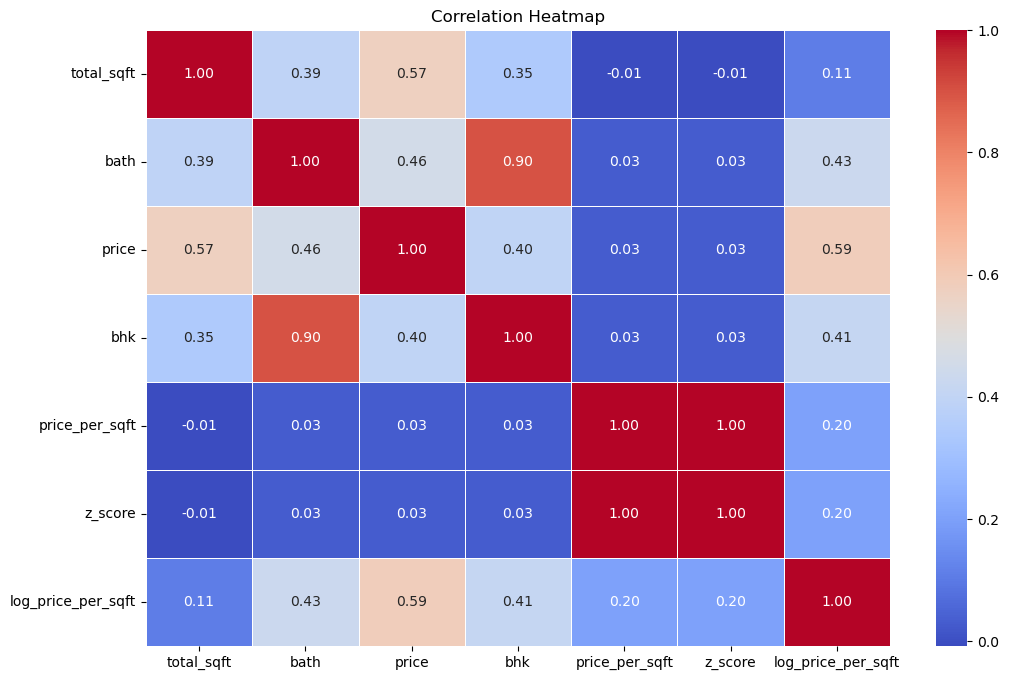

In [12]:
# Correlation and Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Scatter Plot for Correlation


# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Optionally drop NaN values
numeric_df = numeric_df.dropna()

# Create pairplot
sns.pairplot(numeric_df)
plt.suptitle('Scatter Plots of Numerical Columns', y=1.02)  # Adjust title position
plt.show()
